# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

#### Here, sklearn library has nothing related to apriori algorithm so we will import apyori library for use apriori algorithm.
### Installing the apyori library for perform the Apriori algorithm

In [3]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=db4b4ccfa8941cd98cb41b5449e90f4eb4384e3f8cb492e8dd3dc007c9133820
  Stored in directory: c:\users\hello\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


You should consider upgrading via the 'c:\users\hello\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [9]:
!pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hello\\AppData\\Local\\Temp\\pip-uninstall-k_u08rca\\pip.exe'
Consider using the `--user` option or check the permissions.



In [10]:
from apyori import apriori

# Importing the dataset

Link:"https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv"

In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv")

# Data Analysis

In [12]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [15]:
df.shape

(38765, 3)

In [16]:
df.size   #<- It will give total number of elements in the dataset. It means here 98765x3=116295

116295

In [17]:
df.ndim

2

In [19]:
df.isna().sum()   #<- It gves the total number of null values in each columns

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [22]:
# Q1. which of the item is the top selling item?
df.itemDescription.value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Top 10 seling items')

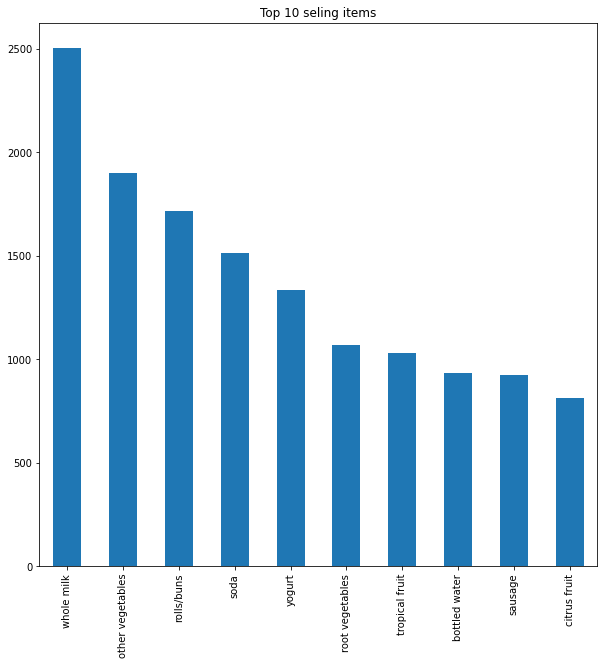

In [26]:
plt.figure(figsize=(10,10))
df.itemDescription.value_counts().head(10).plot(kind="bar")
plt.title("Top 10 seling items")

In [29]:
# Q2. which of the item is the least selling item?
df.itemDescription.value_counts().tail(10).sort_values()
# The value_counts() will give the data in descending order
# This sort_values() will convert the data into ascending order by default

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
frozen chicken           5
toilet cleaner           5
make up remover          5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

<AxesSubplot:>

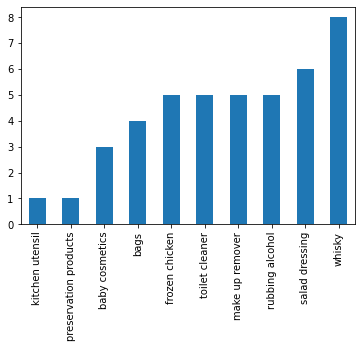

In [30]:
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()

In [31]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [32]:
# Q3. top 10 customers who has bought many products frequently
df.Member_number.value_counts().head(10)

3180    36
3050    33
3737    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
4875    29
Name: Member_number, dtype: int64

<AxesSubplot:>

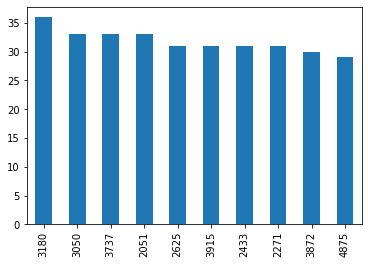

In [33]:
df.Member_number.value_counts().head(10).plot.bar()

In [34]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [38]:
# Create three new columns year,month,date which shows the year,month,date of every purchase
df["Year"]=pd.DatetimeIndex(df["Date"]).year
df["Month"]=pd.DatetimeIndex(df["Date"]).month
df["Day"]=pd.DatetimeIndex(df["Date"]).day

In [39]:
df.head()

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [37]:
# Q4. In which year, the majority of the transaction happened?
df.Year.value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

In [40]:
# In which month, the majority of the transaction happened?
df.Month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Month, dtype: int64

In [41]:
# In which day, the majority of the transaction happened?
df.Day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
10    1308
4     1308
11    1297
24    1290
5     1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: Day, dtype: int64

In [44]:
# Show me in which month of year 2015, most of the transaction happened
df.Month[df.Year==2015].value_counts()

8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: Month, dtype: int64

In [84]:
df[df.Year==2015]

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2
...,...,...,...,...,...,...
37114,1185,24-08-2015,chocolate,2015,8,24
37115,4656,25-12-2015,newspapers,2015,12,25
37116,2741,11-09-2015,canned vegetables,2015,11,9
37117,2654,17-08-2015,coffee,2015,8,17


In [86]:
# Find that in which day of 8th month of 2015, most of the purchase was happened
df[df.Year==2015].Day[df.Month==8].value_counts().head(10)

8     92
21    83
20    83
18    82
15    82
28    79
7     75
13    74
12    73
5     69
Name: Day, dtype: int64

### You can not use any boolean equation in Series .
### You can use this boolean equation only in DataFrame,List,Dictionaries,Between Variables etc.

# Apriori Algorithm



In [87]:
df.head()

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [93]:
data = df.copy()
data1=df.copy()

In [94]:
data=pd.get_dummies(data["itemDescription"])

In [95]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
data1.head()

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [97]:
data1=data1.join(data)

In [104]:
data1.head()

,Member_number,Date,itemDescription,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,tropical fruit,2015,7,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,whole milk,2015,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,pip fruit,2015,9,19,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,other vegetables,2015,12,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,whole milk,2015,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
products=df['itemDescription'].unique()

In [100]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [101]:
products[:]

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [114]:
data1.groupby(['Member_number', 'Date'])

In [113]:
data1.groupby(['Member_number', 'Date']).sum()

Year  Month  Day  Instant food products  UHT-milk  \
Member_number Date                                                             
1000          15-03-2015   8060     12   60                      0         0   
              24-06-2014   6042     18   72                      0         0   
              24-07-2015   4030     14   48                      0         0   
              25-11-2015   4030     22   50                      0         0   
              27-05-2015   4030     10   54                      0         0   
...                         ...    ...  ...                    ...       ...   
4999          24-01-2015  12090      6  144                      0         0   
              26-12-2015   4030     24   52                      0         0   
5000          09-03-2014   4028     18    6                      0         0   
              10-02-2015   6045     30    6                      0         0   
              16-11-2014   4028     22   32                      0         0   

                          abrasive cleaner  artif. sweetener  baby cosmetics  \
Member_number Date                                                             
1000          15-03-2015                 0                 0               0   
              24-06-2014                 0                 0               0   
              24-07-2015                 0                 0               0   
              25-11-2015                 0                 0               0   
              27-05-2015                 0                 0               0   
...                                    ...               ...             ...   
4999          24-01-2015                 0                 0               0   
              26-12-2015                 0                 0               0   
5000          09-03-2014                 0                 0               0   
              10-02-2015                 0                 0               0   
              16-11-2014                 0                 0               0   

                          bags  baking powder  ...  turkey  vinegar  waffles  \
Member_number Date                             ...                             
1000          15-03-2015     0              0  ...       0        0        0   
              24-06-2014     0              0  ...       0        0        0   
              24-07-2015     0              0  ...       0        0        0   
              25-11-2015     0              0  ...       0        0        0   
              27-05-2015     0              0  ...       0        0        0   
...                        ...            ...  ...     ...      ...      ...   
4999          24-01-2015     0              0  ...       0        0        0   
              26-12-2015     0              0  ...       0        0        0   
5000          09-03-2014     0              0  ...       0        0        0   
              10-02-2015     0              0  ...       0        0        0   
              16-11-2014     0              0  ...       0        0        0   

                          whipped/sour cream  whisky  white bread  white wine  \
Member_number Date                                                              
1000          15-03-2015                   0       0            0           0   
              24-06-2014                   0       0            0           0   
              24-07-2015                   0       0            0           0   
              25-11-2015                   0       0            0           0   
              27-05-2015                   0       0            0           0   
...                                      ...     ...          ...         ...   
4999          24-01-2015                   0       0            0           0   
              26-12-2015                   0       0            0           0   
5000          09-03-2014                   0       0            0           0   
             

In [106]:
# This will group the data by its member_number has bought the products in which date and which products
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [108]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [116]:
# It will show the data with index of all products
data2.reset_index()[products[:]]

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
data3=data2.reset_index()[products]

In [130]:
data3.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
data3.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
data3["tropical fruit"]

0        0
1        0
2        0
3        0
4        0
        ..
14958    1
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: uint8

In [135]:
# This will convert all the 1 values of products into the product name
def func(data):
    for i in products:
        if data[i] > 0:
            data[i] = i
    return data

In [136]:
data3=data3.apply(func,axis=1)

In [137]:
data3.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
newdata = data3.values

In [160]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [142]:
newdata.ndim

2

In [161]:
newdata=[i[i!=0].tolist() for i in newdata]   #<- It will give all the non zero values of every row in a list 

In [168]:
newdata

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

In [163]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

# Apriori Algorithm

In [179]:
association=apriori(newdata,
                    min_support=0.0003,
                    min_confidence=0.05,
                    min_lift=3,
                    max_length=2)
result=list(association)

In [180]:
len(result)

7

In [181]:
result

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'roll products ', 'meat'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'misc. beverages', 'salt'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [182]:
result[0]

RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [ ]:
# liver_loaf -> fruit/vegetable juice
# Same as {2,3} -> {5}

In [183]:
len(result[0])

3

In [197]:
result[0][2]

[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]

In [201]:
result[0][2][0]

OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)

In [202]:
result[0][2][0][0]

frozenset({'liver loaf'})

In [195]:
len(result[0][2][0])

4

In [204]:
for i in range(0,1):
    print("base :",result[0][2][0][i])
    print("add :",result[0][2][0][i+1])
    print("confidence :",result[0][2][0][i+2])
    print("lift:",result[0][2][0][i+3])

base : frozenset({'liver loaf'})
add : frozenset({'fruit/vegetable juice'})
confidence : 0.12
lift: 3.5276227897838903


You have to make like this if possible:

Itemset: {'soups', 'seasonal products'}
Association Rule: soups -> seasonal products
Confidence = 0.10416666666666

In [205]:
type(result[0])

apyori.RelationRecord

### For understand about frozenset and more on apyori
### https://www.programiz.com/python-programming/methods/built-in/frozenset
### https://pypi.org/project/apyori/
### https://github.com/ymoch/apyori

In [45]:
%autosave 20

Autosaving every 20 seconds
